In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e7/sample_submission.csv
/kaggle/input/playground-series-s5e7/train.csv
/kaggle/input/playground-series-s5e7/test.csv


In [2]:
# Import Necessary Libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import time
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Import the training and test dataset
train = pd.read_csv("/kaggle/input/playground-series-s5e7/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s5e7/test.csv")
df = pd.concat([train, test], axis=0, ignore_index=True)

# Display the number of rows and columns in the dataset
print("The number of rows and columns in the dataset:", df.shape)

# Display first few rows in the dataset
print("First few rows in the dataset:")
df.head()

The number of rows and columns in the dataset: (24699, 9)
First few rows in the dataset:


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [4]:
df.describe()

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,24699.000000,23084.000000,23122.000000,22767.000000,23295.000000,23027.000000
mean,12349.000000,3.132559,5.270824,4.042693,7.999657,4.993833
std,7130.131485,2.999230,2.754491,2.058194,4.215721,2.876184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6174.500000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,12349.000000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,18523.500000,4.000000,8.000000,6.000000,12.000000,7.000000
max,24698.000000,11.000000,10.000000,7.000000,15.000000,10.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24699 entries, 0 to 24698
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         24699 non-null  int64  
 1   Time_spent_Alone           23084 non-null  float64
 2   Stage_fear                 22208 non-null  object 
 3   Social_event_attendance    23122 non-null  float64
 4   Going_outside              22767 non-null  float64
 5   Drained_after_socializing  23118 non-null  object 
 6   Friends_circle_size        23295 non-null  float64
 7   Post_frequency             23027 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.7+ MB


In [6]:
# Check for missing values in a dataset
print("Missing values in the dataset:")
df.isna().sum()

Missing values in the dataset:


id                              0
Time_spent_Alone             1615
Stage_fear                   2491
Social_event_attendance      1577
Going_outside                1932
Drained_after_socializing    1581
Friends_circle_size          1404
Post_frequency               1672
Personality                  6175
dtype: int64

In [7]:
df = df.dropna(axis=0)
df.isna().sum()

id                           0
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [8]:
df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
7,7,2.0,No,8.0,3.0,No,4.0,5.0,Extrovert
9,9,1.0,No,8.0,6.0,No,14.0,9.0,Extrovert


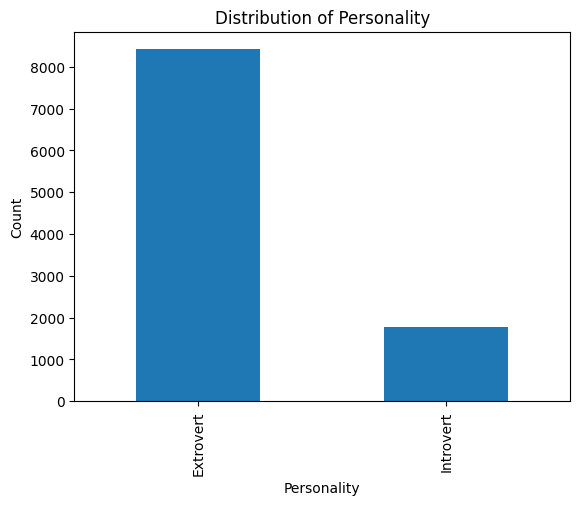

In [9]:
# Visualize the distribution of target variable
df['Personality'].value_counts().plot(kind='bar')
plt.title("Distribution of Personality")
plt.xlabel("Personality")
plt.ylabel("Count")
plt.show()

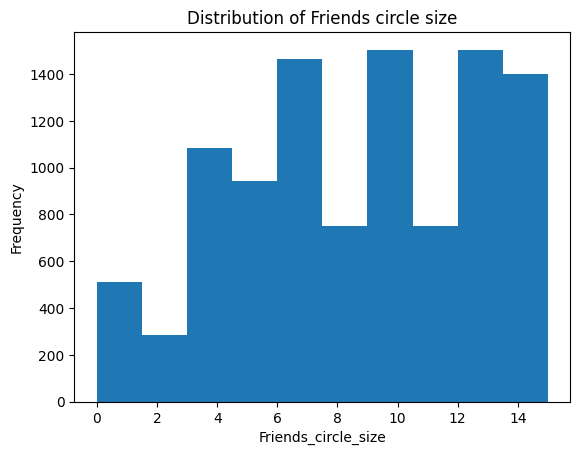

In [10]:
df["Friends_circle_size"].plot(kind='hist', bins=10)
plt.title("Distribution of Friends circle size")
plt.xlabel("Friends_circle_size")
plt.show()

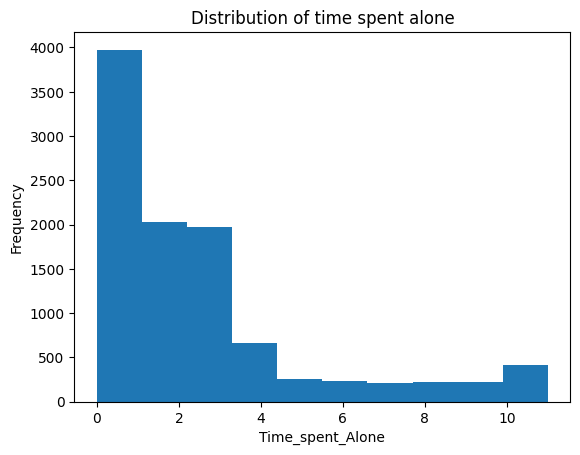

In [11]:
df["Time_spent_Alone"].plot(kind='hist', bins=10)
plt.title("Distribution of time spent alone")
plt.xlabel("Time_spent_Alone")
plt.show()

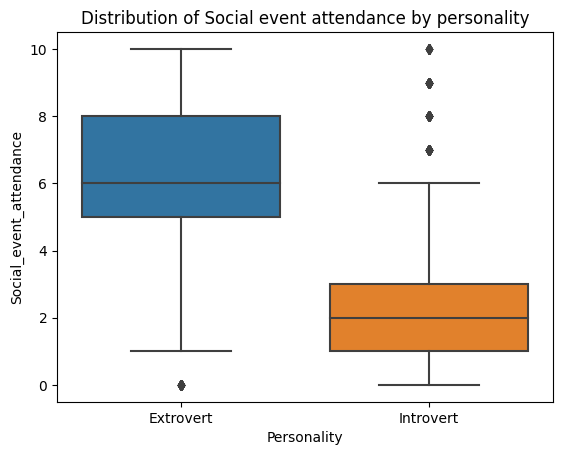

In [12]:
sns.boxplot(data=df, x='Personality', y='Social_event_attendance')
plt.title("Distribution of Social event attendance by personality")
plt.xlabel("Personality")
plt.ylabel("Social_event_attendance")
plt.show()

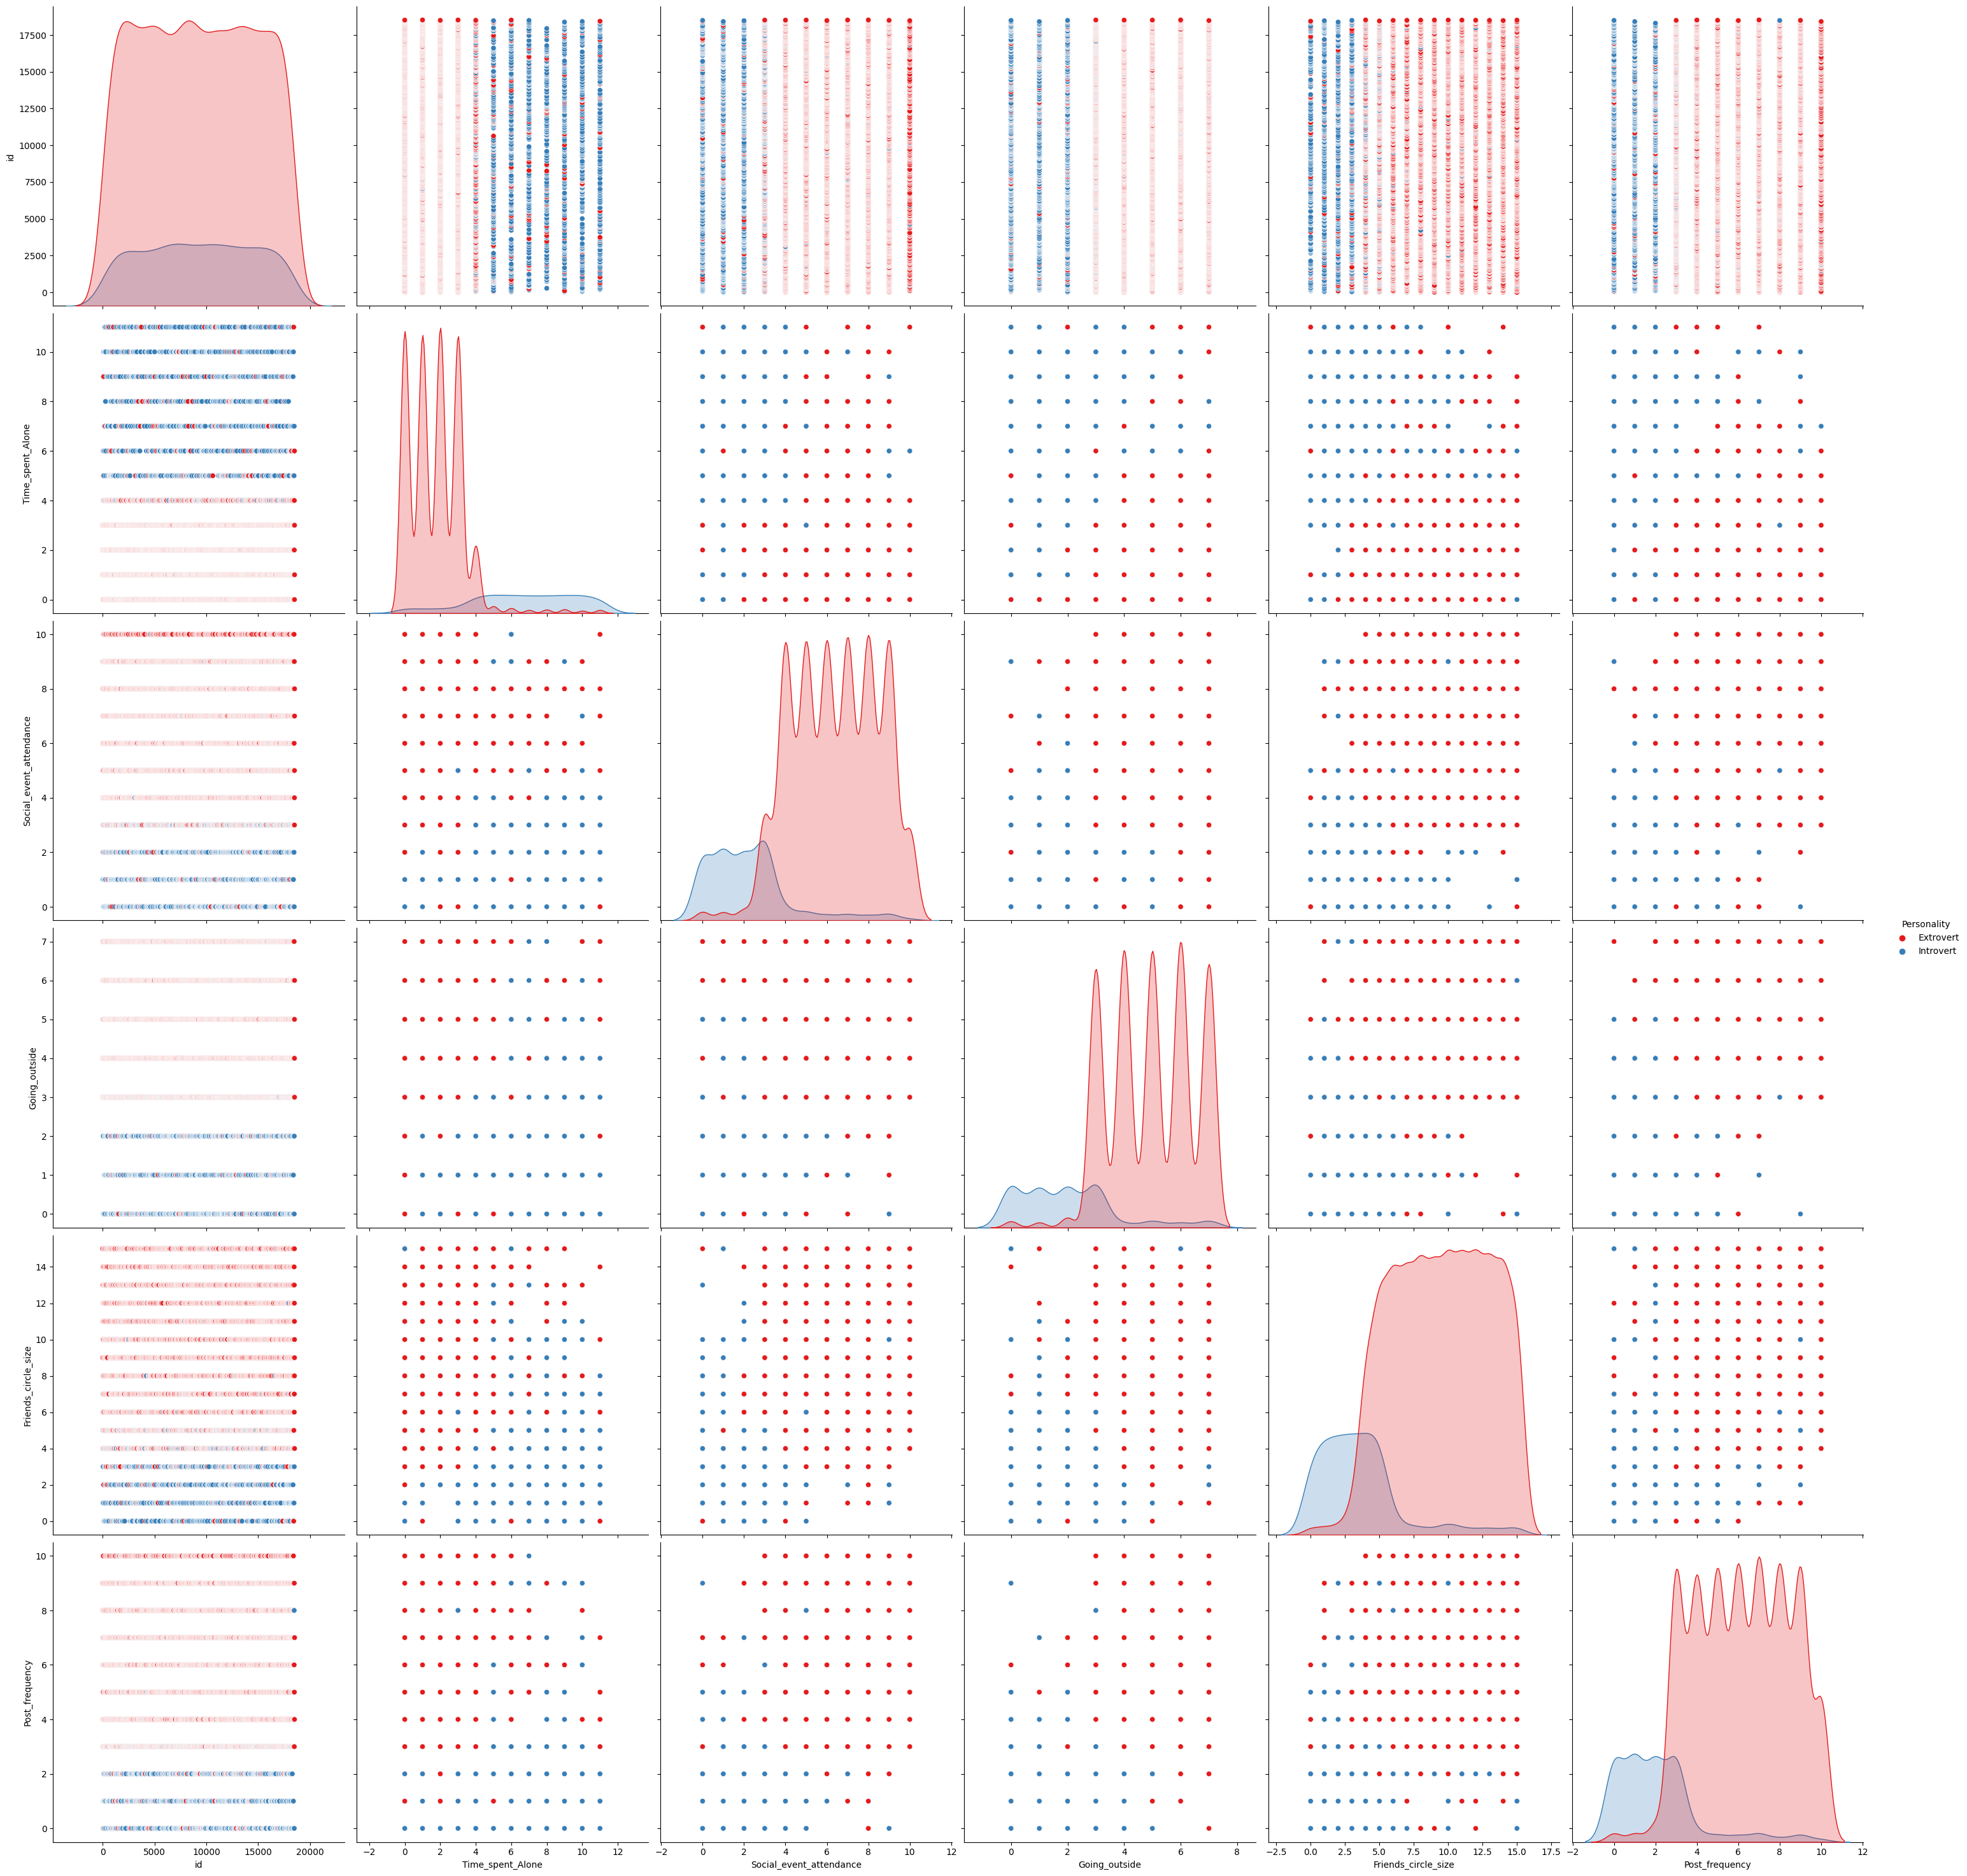

In [13]:
sns.pairplot(df, hue='Personality', palette="Set1", height=5)

In [14]:
# Map the text data into numbers
df["Stage_fear"] = df["Stage_fear"].apply(lambda x: 1 if x == 'Yes' else 0)
df["Drained_after_socializing"] = df["Drained_after_socializing"].apply(lambda x : 1 if x == 'Yes' else 0)
df["Personality"] = df["Personality"].map({'Introvert': 0, 'Extrovert': 1})
df

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,0,6.0,4.0,0,15.0,5.0,1
1,1,1.0,0,7.0,3.0,0,10.0,8.0,1
3,3,3.0,0,7.0,3.0,0,11.0,5.0,1
7,7,2.0,0,8.0,3.0,0,4.0,5.0,1
9,9,1.0,0,8.0,6.0,0,14.0,9.0,1
...,...,...,...,...,...,...,...,...,...
18509,18509,1.0,0,3.0,4.0,0,15.0,4.0,1
18511,18511,0.0,0,4.0,5.0,0,11.0,4.0,1
18514,18514,6.0,0,5.0,3.0,0,10.0,4.0,1
18519,18519,3.0,0,7.0,3.0,0,9.0,7.0,1


In [15]:
# Step 1: Select the features and target variables for modeling
X = df[["id", "Time_spent_Alone", "Social_event_attendance", "Going_outside", "Friends_circle_size", "Post_frequency", "Stage_fear", "Drained_after_socializing"]]
y = df["Personality"]

# Step 2: Split the data into training and test set with a test size of 30% 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
# Step 3: Initialize and train a Logistic Regression Model using the training data
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Step 4: Print the model's accuracy on the test data
logistic_pred = logistic_model.predict(X_test)
print("Logistic Regression Accuracy Score:", accuracy_score(y_test, logistic_pred))

Logistic Regression Accuracy Score: 0.957801766437684


In [17]:
# Step 5: Initialize and train a Decision Tree classifier using the training data
dec_tree_model = DecisionTreeClassifier()
dec_tree_model.fit(X_train, y_train)

# Step 6: Print the model's accuracy score on the test data
dec_tree_pred = dec_tree_model.predict(X_test)
print("Decision Tree Accuracy Score:", accuracy_score(y_test, dec_tree_pred))

Decision Tree Accuracy Score: 0.9280340202813215


### Model training using advance models

In [18]:
# Step 1: Initialize and train a Gradient Boosting Classifier with 50 estimators using the training data
gb_model = GradientBoostingClassifier(n_estimators=50)
gb_model.fit(X_train, y_train)

# Step 2: Print the model's accuracy score on the test data
gb_pred = gb_model.predict(X_test)
print("Gradient Boosting Classifier Accuracy Score:", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier Accuracy Score: 0.9581288845273144


In [19]:
# Step 3: Initialize and train a XGBoost Classifier with 50 estimators using the training data
xgb_model = XGBClassifier(n_estimators=50)
xgb_model.fit(X_train, y_train)

# Step 4: Print the model's accuracy on the test data
xgb_pred = xgb_model.predict(X_test)
print("XGBClassifier Accuracy Score:", accuracy_score(y_test, xgb_pred))

XGBClassifier Accuracy Score: 0.9581288845273144


In [20]:
# Step 6: Initialize and train a XGBoost Classifier with hyperparameters
xgb_model_hyper = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, colsample_bytree=0.5)
xgb_model_hyper.fit(X_train, y_train)

# Step 7: Print the moel's accuracy score on the test data
xgb_hyper_pred = xgb_model_hyper.predict(X_test)
print("XGBClassifier (Hyperparameters) Accuracy Score:", accuracy_score(y_test, xgb_hyper_pred))

XGBClassifier (Hyperparameters) Accuracy Score: 0.9587831207065751


In [21]:
# Step 8: Print the classification report and confusion matrix for the model
print("Classification Report:")
print(classification_report(y_test, xgb_hyper_pred))

print('*' * 50)

print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_hyper_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       509
           1       0.97      0.98      0.98      2548

    accuracy                           0.96      3057
   macro avg       0.93      0.92      0.92      3057
weighted avg       0.96      0.96      0.96      3057

**************************************************
Confusion Matrix:
[[ 436   73]
 [  53 2495]]


In [22]:
output = xgb_hyper_pred
mapping = {1: 'Extrovert', 0: 'Introvert'}
final_output = pd.Series(output).map(mapping)

submission_df = pd.DataFrame({'id': test['id'], 'Personality': final_output})
submission_df.to_csv('submission.csv', index=False)

print("Submission file head:")
print(submission_df.head())

Submission file head:
      id Personality
0  18524   Extrovert
1  18525   Introvert
2  18526   Extrovert
3  18527   Extrovert
4  18528   Extrovert
